# AAI612: Deep Learning & its Applications

*Notebook 5.1: Fashion MNIST*

<a href="https://colab.research.google.com/github/harmanani/AAI612/blob/main/Week5/Notebook5.1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Fashion MNIST Example

In this code, we build a model to recognize different items of clothing, trained from a dataset containing 10 different types.  The Fashion MNIST data is available directly in the tf.keras datasets API:

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

In [2]:
import ssl

ssl._create_default_https_context = ssl._create_unverified_context
mnist = tf.keras.datasets.fashion_mnist

Calling load_data on this object will give you two sets of two lists, these will be the training and testing values for the graphics that contain the clothing items and their labels.


In [3]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 3us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 75s 3us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 12s 3us/step


What does these values look like? Let's print a training image, and a training label to see...Experiment with different indices in the array. For example, also take a look at index 42...that's a a different boot than the one at index 0


9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 

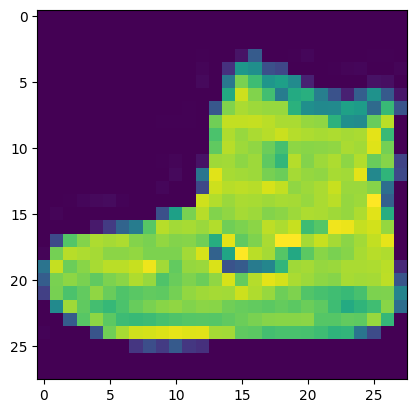

In [4]:
import numpy as np
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt
plt.imshow(training_images[0])
print(training_labels[0])
print(training_images[0])

You'll notice that all of the values in the number are between 0 and 255. If we are training a neural network, for various reasons it's easier if we treat all values as between 0 and 1, a process called '**normalizing**'...and fortunately in Python it's easy to normalize a list like this without looping. You do it like this:

In [5]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

Now you might be wondering why there are 2 sets...training and testing -- remember we spoke about this in the intro? The idea is to have 1 set of data for training, and then another set of data...that the model hasn't yet seen...to see how good it would be at classifying values. After all, when you're done, you're going to want to try it out with data that it hadn't previously seen!

Let's now design the model. There's quite a few new concepts here, but don't worry, you'll get the hang of them. 

In [6]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

**Sequential**: That defines a SEQUENCE of layers in the neural network

**Flatten**: Remember earlier where our images were a square, when you printed them out? Flatten just takes that square and turns it into a 1 dimensional set.

**Dense**: Adds a layer of neurons

Each layer of neurons need an **activation function** to tell them what to do. There's lots of options, but just use these for now. 

**Relu** effectively means "If X>0 return X, else return 0" -- so what it does it it only passes values 0 or greater to the next layer in the network.

**Softmax** takes a set of values, and effectively picks the biggest one, so, for example, if the output of the last layer looks like [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05], it saves you from fishing through it looking for the biggest value, and turns it into [0,0,0,0,1,0,0,0,0] -- The goal is to save a lot of coding!


The next thing to do, now the model is defined, is to actually build it. You do this by compiling it with an optimizer and loss function as before -- and then you train it by calling **model.fit ** asking it to fit your training data to your training labels -- i.e. have it figure out the relationship between the training data and its actual labels, so in future if you have data that looks like the training data, then it can make a prediction for what that data would look like. 

In [7]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=15)

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 18ms/step - accuracy: 0.7986 - loss: 0.5740
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.8665 - loss: 0.3625
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 17ms/step - accuracy: 0.8788 - loss: 0.3238
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 17ms/step - accuracy: 0.8909 - loss: 0.2964
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.8946 - loss: 0.2818
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 17ms/step - accuracy: 0.9016 - loss: 0.2622
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.9055 - loss: 0.2492
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.9084 - loss: 0.2386
Epoch 9/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.9151 - loss: 0.2275
Epoch 10/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.9194 - loss: 0.2135
Epoch 11/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.9237 - loss: 0.2063
Epoch 12

You should be able to achive a training accuracy of of at least 91%

But how would it work with unseen data? That's why we have the test images. We can call model.evaluate, and pass in the two sets, and it will report back the loss for each. Let's give it a try:

In [8]:
model.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8904 - loss: 0.3470


[0.33620232343673706, 0.8935999870300293]

For me, that returned a accuracy of about .8838, which means it was about 88% accurate. As expected it probably would not do as well with *unseen* data as it did with data it was trained on!  As you go through this course, you'll look at ways to improve this. 

### Question 1.1:
For this first exercise run the below code: It creates a set of classifications for each of the test images, and then prints the first entry in the classifications.

In [9]:
classifications = model.predict(test_images)

print(classifications[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[2.0090812e-10 1.0626549e-13 4.9416066e-10 9.3818284e-15 2.4422387e-15 8.5590873e-06 6.4357521e-12 4.0979809e-04 1.3320198e-12 9.9958163e-01]


What does the above output signify, after you run it is a list of numbers? Why do you think this is, and what do those numbers represent? 

**Hint:** try running `print(test_labels[0])` -- and you'll get a `9`. Does that help you understand why this list looks the way it does? 

### Answer:
yes the output is a list of probabilities and each value corresponds to the model's confidence that the image belong to a particular class.
-each element in the list corresponds to the proba that the test image belongs to that specific class (from 0 to 9)
-the highest proba is 9.995..-01 at index 9  

### Question 1.2: What does this list represent? (Select one option)


1.   It's 10 random meaningless values
2.   It's the first 10 classifications that the computer made
3.   It's the probability that this item is each of the 10 classes


### Answer:
3. its the proba that this item is each of the classes

### Question 1.3: How do you know that this list tells you that the item is an ankle boot?


1.   There's not enough information to answer that question
2.   The 10th element on the list is the biggest, and the ankle boot is labelled 9
2.   The ankle boot is label 9, and there are 0->9 elements in the list


### Answer:
2. the 10th element on the list is the biggest and the ankle boot is labelled 9

### Question 2: 
Let's now look at the layers in your model. Experiment with different values for the dense layer with 512 neurons. What different results do you get for loss, training time etc? Why do you think that's the case? 


In [12]:
mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu), # Try experimenting with this layer
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 17ms/step - loss: 0.3066
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - loss: 0.0766
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - loss: 0.0462
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - loss: 0.0329
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - loss: 0.0249
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0832
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[8.4846088e-11 2.2281059e-09 1.3033395e-08 2.1564147e-06 1.4673025e-12 4.5791704e-12 5.8007879e-14 9.9999750e-01 2.8561686e-09 4.1032564e-07]
7


### Question 2.1: Increase to 1024 Neurons -- What's the impact?

1. Training takes longer, but is more accurate
2. Training takes longer, but no impact on accuracy
3. Training takes the same time, but is more accurate


### Answer:
1024 neuron: 
time:2m 55s
class 7
[8.4846088e-11 2.2281059e-09 1.3033395e-08 2.1564147e-06 1.4673025e-12 4.5791704e-12 5.8007879e-14 9.9999750e-01 2.8561686e-09 4.1032564e-07]
--> here we have 9.99 for the class 7 

512 neuron:
time: 1m 25m
class 7
[1.4808884e-09 5.6760681e-09 9.9361914e-09 3.5788185e-06 2.3885364e-13 1.3555812e-10 8.8257187e-14 9.9999607e-01 8.0437135e-10 3.0837123e-07]
--> here we have 9.93 for class 2 and 9.99 for class 7 

so 1. trainig takes longer but is more accurate 

### Question 3: What would happen if you remove the Flatten() layer. Why do you think that's the case? 

In [15]:
mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
                                    

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

Epoch 1/5


ValueError: Argument `output` must have rank (ndim) `target.ndim - 1`. Received: target.shape=(32,), output.shape=(32, 28, 10)

### Answer:
with the flatten() layer:
[6.5510557e-07 5.6667901e-09 1.2653324e-04 2.4844571e-03 2.5127098e-09 2.4216899e-06 1.4723035e-11 9.9730718e-01 1.5535610e-05 6.3173138e-05]
time: 27.4

without the flatten() layer:
ValueError: Argument `output` must have rank (ndim) `target.ndim - 1`. Received: target.shape=(32,), output.shape=(32, 28, 10)
flatten transform the 3D shape (32, 28, 10) to a vector shape of (32) which is the target shape needed 



### Question 4: 

Consider the final (output) layers. Why are there 10 of them? What would happen if you had a different amount than 10? For example, try training the network with 5.

In [17]:
mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(5, activation=tf.nn.softmax) # Try experimenting with this layer
                                  ])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

Epoch 1/5


InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "C:\Users\acer\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py", line 18, in <module>

  File "C:\Users\acer\AppData\Roaming\Python\Python312\site-packages\traitlets\config\application.py", line 1075, in launch_instance

  File "C:\Users\acer\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelapp.py", line 739, in start

  File "C:\Users\acer\AppData\Roaming\Python\Python312\site-packages\tornado\platform\asyncio.py", line 205, in start

  File "c:\Program Files\Python312\Lib\asyncio\base_events.py", line 641, in run_forever

  File "c:\Program Files\Python312\Lib\asyncio\base_events.py", line 1986, in _run_once

  File "c:\Program Files\Python312\Lib\asyncio\events.py", line 88, in _run

  File "C:\Users\acer\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelbase.py", line 545, in dispatch_queue

  File "C:\Users\acer\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelbase.py", line 534, in process_one

  File "C:\Users\acer\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelbase.py", line 437, in dispatch_shell

  File "C:\Users\acer\AppData\Roaming\Python\Python312\site-packages\ipykernel\ipkernel.py", line 362, in execute_request

  File "C:\Users\acer\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelbase.py", line 778, in execute_request

  File "C:\Users\acer\AppData\Roaming\Python\Python312\site-packages\ipykernel\ipkernel.py", line 449, in do_execute

  File "C:\Users\acer\AppData\Roaming\Python\Python312\site-packages\ipykernel\zmqshell.py", line 549, in run_cell

  File "C:\Users\acer\AppData\Roaming\Python\Python312\site-packages\IPython\core\interactiveshell.py", line 3075, in run_cell

  File "C:\Users\acer\AppData\Roaming\Python\Python312\site-packages\IPython\core\interactiveshell.py", line 3130, in _run_cell

  File "C:\Users\acer\AppData\Roaming\Python\Python312\site-packages\IPython\core\async_helpers.py", line 128, in _pseudo_sync_runner

  File "C:\Users\acer\AppData\Roaming\Python\Python312\site-packages\IPython\core\interactiveshell.py", line 3334, in run_cell_async

  File "C:\Users\acer\AppData\Roaming\Python\Python312\site-packages\IPython\core\interactiveshell.py", line 3517, in run_ast_nodes

  File "C:\Users\acer\AppData\Roaming\Python\Python312\site-packages\IPython\core\interactiveshell.py", line 3577, in run_code

  File "C:\Users\acer\AppData\Local\Temp\ipykernel_17728\2244454557.py", line 16, in <module>

  File "C:\Users\acer\AppData\Roaming\Python\Python312\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "C:\Users\acer\AppData\Roaming\Python\Python312\site-packages\keras\src\backend\tensorflow\trainer.py", line 371, in fit

  File "C:\Users\acer\AppData\Roaming\Python\Python312\site-packages\keras\src\backend\tensorflow\trainer.py", line 219, in function

  File "C:\Users\acer\AppData\Roaming\Python\Python312\site-packages\keras\src\backend\tensorflow\trainer.py", line 132, in multi_step_on_iterator

  File "C:\Users\acer\AppData\Roaming\Python\Python312\site-packages\keras\src\backend\tensorflow\trainer.py", line 113, in one_step_on_data

  File "C:\Users\acer\AppData\Roaming\Python\Python312\site-packages\keras\src\backend\tensorflow\trainer.py", line 60, in train_step

  File "C:\Users\acer\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\trainer.py", line 383, in _compute_loss

  File "C:\Users\acer\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\trainer.py", line 351, in compute_loss

  File "C:\Users\acer\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\compile_utils.py", line 691, in __call__

  File "C:\Users\acer\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\compile_utils.py", line 700, in call

  File "C:\Users\acer\AppData\Roaming\Python\Python312\site-packages\keras\src\losses\loss.py", line 67, in __call__

  File "C:\Users\acer\AppData\Roaming\Python\Python312\site-packages\keras\src\losses\losses.py", line 33, in call

  File "C:\Users\acer\AppData\Roaming\Python\Python312\site-packages\keras\src\losses\losses.py", line 2246, in sparse_categorical_crossentropy

  File "C:\Users\acer\AppData\Roaming\Python\Python312\site-packages\keras\src\ops\nn.py", line 1963, in sparse_categorical_crossentropy

  File "C:\Users\acer\AppData\Roaming\Python\Python312\site-packages\keras\src\backend\tensorflow\nn.py", line 744, in sparse_categorical_crossentropy

Received a label value of 9 which is outside the valid range of [0, 5).  Label values: 1 2 3 6 1 5 8 2 6 9 7 3 2 1 4 6 6 9 9 0 0 5 4 4 4 2 3 1 7 2 8 1
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_multi_step_on_iterator_439366]

### Answer:
of course 5 wont work as we have 10 classes and for the images that are labled form 5 to 9 will give a unvalid range error

### Question 5: 

Consider the effects of additional layers in the network. What will happen if you add another layer between the one with 512 and the final layer with 10. 

In [18]:
mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(2048, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
                                  ])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 125s 65ms/step - loss: 0.3233
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 117s 63ms/step - loss: 0.1029
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 120s 64ms/step - loss: 0.0727
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 141s 63ms/step - loss: 0.0550
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 129s 69ms/step - loss: 0.0449
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.1082
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
[6.2798405e-11 2.7004521e-07 2.7861461e-08 7.9903100e-07 6.0966756e-09 2.1381251e-11 7.3282648e-15 9.9999750e-01 8.3931280e-09 1.3623809e-06]
7


### Answer:
first it takes too much more time 
loss has increased in some epochs 0.08 --? 0.1
but it gives the same result 


### Question 6: 

Consider the impact of training for more or less epochs. Why do you think that would be the case? 

- Try 15 epochs -- you'll probably get a model with a much better loss than the one with 5
- Try 30 epochs -- you might see the loss value stops decreasing, and sometimes increases.

In [20]:
mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=30) # Experiment with the number of epochs

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[34])
print(test_labels[34])

Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 0.4289
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.1166
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0724
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 0.0561
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0408
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0325
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0238
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0219
Epoch 9/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0174
Epoch 10/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0148
Epoch 11/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0127
Epoch 12/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0106
Epoch 13/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0088
Epoch 14/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0086
Epoch 15/30
1875/1875 ━━━━━━

### Answer:
15 ephocs: 1m 44s
[1.0523996e-13 6.2096946e-11 7.0499901e-08 1.0883979e-06 6.5860720e-19 2.3170369e-22 2.8557516e-21 9.9999881e-01 2.7911868e-12 2.9417445e-12]


30 epochs: 3m
[9.7277428e-24 2.5043968e-17 2.6787171e-12 4.0341113e-09 5.1223404e-27 1.1892601e-32 2.5286502e-36 1.0000000e+00 1.8411731e-19 4.1975946e-18]


in 5 epochs we could see underffitting and high loss with low accuracy in some epochs but it well be fast

in 15 epochs the learning improves as the model has more time to adjust the weights and reduce the loss

in 30 epochs it may lead to overfitting as the module may memorize the training instead od learning


### Question 7: 

Before you trained, you normalized the data, going from values that were 0-255 to values that were 0-1. What would be the impact of removing that? Here's the complete code to give it a try. Why do you think you get different results? 

In [22]:
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - loss: 8.2071
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - loss: 0.3335
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 10ms/step - loss: 0.2892
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - loss: 0.2554
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - loss: 0.2392
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3274
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[2.6149383e-27 1.7961222e-20 4.5498180e-15 1.9147684e-16 1.9481748e-23 9.5223901e-17 0.0000000e+00 1.0000000e+00 8.6630397e-22 3.2245730e-20]
7


### Answer:
large input values like 255 can cause issues with the gradient calculation and normalized values lead to smoother and more stable gradient 
and also small input values help the model converge faster during training 
so removing the normalization well slow the trainig and reduce the accuracy 

### Question 8: 

Earlier when you trained for extra epochs you had an issue where your loss might change. It might have taken a bit of time for you to wait for the training to do that, and you might have thought 'wouldn't it be nice if I could stop the training when I reach a desired value?' -- i.e. 95% accuracy might be enough for you, and if you reach that after 3 epochs, why sit around waiting for it to finish a lot more epochs....So how would you fix that?

In [25]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') >= 0.9): # Experiment with changing this value
      print("\nReached 60% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=15, callbacks=[callbacks])


Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.7931 - loss: 0.5895
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.8657 - loss: 0.3695
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.8797 - loss: 0.3256
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.8885 - loss: 0.2996
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.8973 - loss: 0.2773
Epoch 6/15
1870/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9033 - loss: 0.2598
Reached 60% accuracy so cancelling training!
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9033 - loss: 0.2598


### Answer:
i tried it with 15 epochs to see it in more clear way
it saves time to reach the goal and also prevent overfitting by avoiding unnecessary extra epochs 